<a href="https://colab.research.google.com/github/toraaglobal/CustomerReview/blob/master/text_Benoulli_Multinomial_Naive_Bayes_Sci_kit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Reviews Classification of Sentiment and Authenticity Using Benoulli and Multinomial Naïve Bayes


### Load Packages
The following python packages are used for this experiment

In [0]:
## import packages
import pandas as pd # for tabular data manipulation
import numpy as np  # for numeric computing
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns # visulization

from sklearn.naive_bayes import MultinomialNB  #Mulitinomial Naive bayes implementation in sklearn
from sklearn.naive_bayes import BernoulliNB    #BernoulliNB implementation in sklear

#vectoriation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split  #splitting data to train and test set

from sklearn.model_selection import cross_val_score   #model evaluation

from sklearn.pipeline import Pipeline # create a model pipeline

from sklearn.metrics import confusion_matrix  # confusion matrix, model evaluation

import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk.stem


%matplotlib inline


### Load Datasets
The datasets contains customers reviews on restaurant.

We need to mount google drive to be able to load the data from the gdrive.

In [2]:
## Mount gdrive 
from google.colab import drive
drive.mount('/content/drive')


#change directry to the gdrive
os.chdir('./drive/My Drive/Colab Notebooks/code')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
## Load datsets
deception = pd.read_csv('../data/deception_data_converted_final.csv')
print("deception shape: {}".format(deception.shape))

deception.head()

deception shape: (92, 24)


,lie,sentiment,review,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,f,n,'Mike\'s Pizza High Point,NY Service was very slow and the quality was ...,not. Stick to pre-made dishes like stuffed pa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f,n,'i really like this buffet restaurant in Marsh...,japanese,and chinese dishes. we also got a free drink ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f,n,'After I went shopping with some of my friend,we went to DODO restaurant for dinner. I foun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f,n,'Olive Oil Garden was very disappointing. I ex...,and the waitor had no manners whatsoever. Don...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f,n,'The Seven Heaven restaurant was never known f...,never more. ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observation: There are three columns in the datasets. lie, sentiment and reviews. Other unnamed columns are part of the customer reviews. This columns will be concatenated together and strip off the NaN, to make up the customer reviews columns

In [4]:

##check the columns
print(deception.columns)

Index(['lie', 'sentiment', 'review', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


Combined all the reviews columns together.

In [0]:
## columns that might have some reviews data 

col = ['Unnamed: 3','Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23']

Concat all the columns to the reviews

In [6]:

##concat
for c in col:
  deception['review'] = deception['review'].astype(str).str.cat(deception[c].astype(str), sep=' ')
  
deception.head()

,lie,sentiment,review,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,f,n,'Mike\'s Pizza High Point NY Service was very...,NY Service was very slow and the quality was ...,not. Stick to pre-made dishes like stuffed pa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f,n,'i really like this buffet restaurant in Marsh...,japanese,and chinese dishes. we also got a free drink ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f,n,'After I went shopping with some of my friend ...,we went to DODO restaurant for dinner. I foun...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f,n,'Olive Oil Garden was very disappointing. I ex...,and the waitor had no manners whatsoever. Don...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f,n,'The Seven Heaven restaurant was never known f...,never more. ',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check the first customer review

In [7]:
deception['review'][0]

"'Mike\\'s Pizza High Point  NY Service was very slow and the quality was low. You would think they would know at least how to make good pizza  not. Stick to pre-made dishes like stuffed pasta or a salad. You should consider dining else where.' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan"

Remove all the NaN from the reviews and drop all unwanted columns from the dataframe.

Columns: lie, sentiment and reviews

In [8]:
## dropunwanted columns
deception.drop(col,axis=1, inplace=True)

deception.head()

,lie,sentiment,review
0,f,n,'Mike\'s Pizza High Point NY Service was very...
1,f,n,'i really like this buffet restaurant in Marsh...
2,f,n,'After I went shopping with some of my friend ...
3,f,n,'Olive Oil Garden was very disappointing. I ex...
4,f,n,'The Seven Heaven restaurant was never known f...


we have two labels for the customer review, the lie and sentiment

check the number of categories for each label

In [11]:
deception.lie.value_counts()

t    46
f    46
Name: lie, dtype: int64

In [12]:
deception.sentiment.value_counts()

n    46
p    46
Name: sentiment, dtype: int64

The datasets for each label of sentiment and authenticity is balanced. 46 for each class label

### Clean Text

Collect all the text in a list and clean the contents by removing stop words, NaN 

In [14]:
allText = deception['review'].values
allText[:2]

array(["'Mike\\'s Pizza High Point  NY Service was very slow and the quality was low. You would think they would know at least how to make good pizza  not. Stick to pre-made dishes like stuffed pasta or a salad. You should consider dining else where.' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan",
       "'i really like this buffet restaurant in Marshall street. they have a lot of selection of american  japanese  and chinese dishes. we also got a free drink and free refill. there are also different kinds of dessert. the staff is very friendly. it is also quite cheap compared with the other restaurant in syracuse area. i will definitely coming back here.' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan"],
      dtype=object)

Clean the text: customer reviews

In [16]:
newText = []

for line in allText:
    ### More cleaning....
    line=line.replace("\\n","")
    #print(line)
    line=line.strip("\\n")
    line=line.replace("\\'","")
    line=line.replace("\\","")
    line=line.replace('"',"")
    line=line.replace("'","")
    line=line.replace("s'","")
    line=line.lstrip()
    line =line.replace('nan','')
    line =line.replace('na','')
    line =line.replace('.','')
    line =line.replace('!','')
    line =line.replace('(','')
    line =line.replace(')','')
    line =line.replace('   ','')
    #print(line)
    newText.append(line)
      
    
newText[:5]  #the clean text

['Mikes Pizza High Point  NY Service was very slow and the quality was low You would think they would know at least how to make good pizza  not Stick to pre-made dishes like stuffed pasta or a salad You should consider dining else where ',
 'i really like this buffet restaurant in Marshall street they have a lot of selection of american  japanese  and chinese dishes we also got a free drink and free refill there are also different kinds of dessert the staff is very friendly it is also quite cheap compared with the other restaurant in syracuse area i will definitely coming back here ',
 'After I went shopping with some of my friend  we went to DODO restaurant for dinner I found worm in one of the dishes',
 'Olive Oil Garden was very disappointing I expect good food and good service at least when I go out to eat The meal was cold when we got it  and the waitor had no manners whatsoever Dont go to the Olive Oil Garden',
 'The Seven Heaven restaurant was never known for a superior service 

Add the clean text to the dataframe

In [17]:
deception['cleanreview'] = newText
deception.head()

,lie,sentiment,review,cleanreview
0,f,n,'Mike\'s Pizza High Point NY Service was very...,Mikes Pizza High Point NY Service was very sl...
1,f,n,'i really like this buffet restaurant in Marsh...,i really like this buffet restaurant in Marsha...
2,f,n,'After I went shopping with some of my friend ...,After I went shopping with some of my friend ...
3,f,n,'Olive Oil Garden was very disappointing. I ex...,Olive Oil Garden was very disappointing I expe...
4,f,n,'The Seven Heaven restaurant was never known f...,The Seven Heaven restaurant was never known fo...


Function to generate a wordcloud from text

In [0]:
def generate_wordcloud(text, max_font_size=80, max_words=100, background_color="white"):
    '''generate word cloud from text '''
    wordcloud = WordCloud(max_font_size=max_font_size, max_words=max_words, background_color=background_color).generate(text)
    #display generated image
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    #figname = str(text) + '.png'
    #plt.savefig(figname)
    plt.show()

### Wordcloud of the reviews

Wordcloud of False Reviews

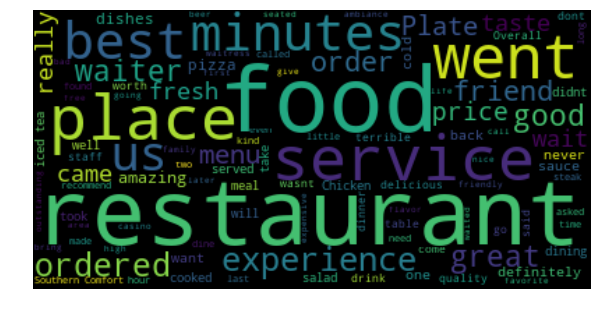

In [22]:
#create a wordclod of the false text
ftext = ''

#deception['newreview'][1]

for i in range(len(deception)):
  if deception['lie'][i] == 'f':
    ftext = ftext + deception['cleanreview'][i]
    
    
    
generate_wordcloud(ftext,background_color='black')

Wordcloud for true customer reviews

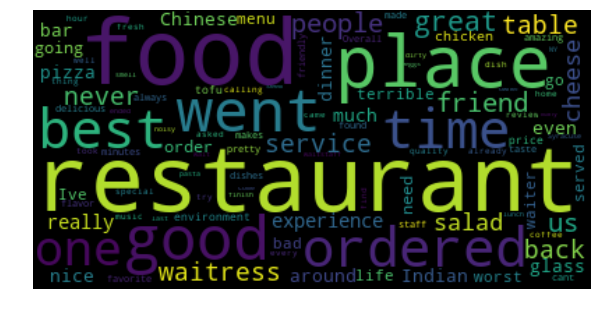

In [24]:
#create a wordclod of the false text
ttext = ''

#deception['newreview'][1]

for i in range(len(deception)):
  if deception['lie'][i] == 't':
    ttext = ttext + deception['cleanreview'][i]
    
    
    
generate_wordcloud(ttext,background_color='black')

Create a wordcloud for positive sentiment

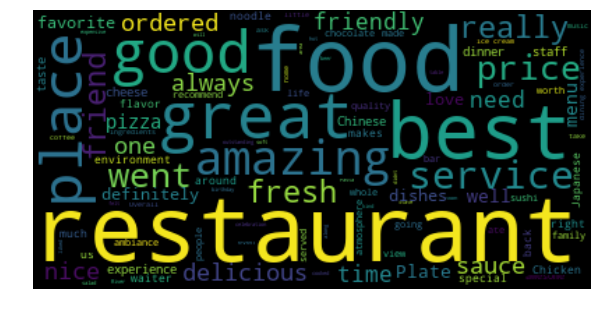

In [25]:
#create a wordclod for positive sentiment
ptext = ''

#deception['newreview'][1]

for i in range(len(deception)):
  if deception['sentiment'][i] == 'p':
    ptext = ptext + deception['cleanreview'][i]
    
    
    
generate_wordcloud(ptext,background_color='black')

Create a wordcloud for negative sentiment

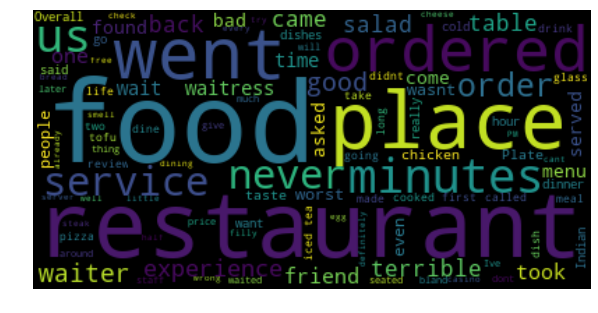

In [26]:
#create a wordclod for negative sentiment
ntext = ''

#deception['newreview'][1]

for i in range(len(deception)):
  if deception['sentiment'][i] == 'n':
    ntext = ntext + deception['cleanreview'][i]
    
    
    
generate_wordcloud(ntext,background_color='black')

### Split the datasets to Train and Test set

In [31]:
train,test = train_test_split(deception, test_size=0.2, random_state=0)

print('test shape: {}'.format(test.shape))
print('train shape: {}'.format(train.shape))

## check the label classes in both train and test set
print('='*50)
print("===Train Lie Value Counts===")
print(train.lie.value_counts())
print("===Train Sentiment Value Counts===")
print(train.sentiment.value_counts())

print("===Test Lie Value Count===")
print(test.lie.value_counts())
print("===Test Sentiment Value Counts===")
print(test.sentiment.value_counts())

test shape: (19, 4)
train shape: (73, 4)
===Train Lie Value Counts===
t    37
f    36
Name: lie, dtype: int64
===Train Sentiment Value Counts===
p    38
n    35
Name: sentiment, dtype: int64
===Test Lie Value Count===
f    10
t     9
Name: lie, dtype: int64
===Test Sentiment Value Counts===
n    11
p     8
Name: sentiment, dtype: int64


In [34]:
train.head()

,lie,sentiment,review,cleanreview
30,t,n,'I went to Applebees (regrettably) once and it...,I went to Applebees regrettably once and it wa...
41,t,n,'After reading the reviews as well listening t...,After reading the reviews as well listening to...
54,f,p,'This restaurant ROCKS! I mean the food is gre...,This restaurant ROCKS I mean the food is great...
6,f,n,'I went to ABC restaurant two days ago and I h...,I went to ABC restaurant two days ago and I ha...
43,t,n,'I have been to a Asian restaurant in New York...,I have been to a Asian restaurant in New York ...


### Vectorization

build a list of strings to pass into the vectorizer

In [37]:
## cleanreviews from train datasets

myList = train.cleanreview.values

print("Before")
print(type(myList))
myList = list(myList)
print("After")
print(type(myList))

Before
<class 'numpy.ndarray'>
After
<class 'list'>


Check some of the content of the list

In [38]:
myList[:5]

['I went to Applebees regrettably once and it was a train-wreck The server was in a terrible mood  the beers arrived after the dinner was delivered  the appetizer was wrong  food was bad  the check was wrong  and there were barely any other people inside I was pretty baffled at how so many things just went wrong in the whole process  the restaurant wasnt even busy ',
 'After reading the reviews as well listening to all my friends rave about Dinosaur Bar-B-Que  I decided to try it out This is definitely the kind of place for you if you are into crowded  noisy and people-walking-all-over type of person Unfortutely I am not that type of person I found the place dirty  noisy  too crowded  and the smell of the people over powered the smell of the food There were also loads of beer floating around and as the minutes flowed by  people just became rowdier Although the food was good  I would not rate it as you have to try it before you die kinda food Sorry Dinosaur Bar-B-Que  you are just not m

In [0]:
## Vectorization

#  unigram boolean vectorizer, set minimum document frequency to 5
unigram_bool_vectorizer = CountVectorizer(input="content",encoding='latin-1', binary=True, min_df=5, stop_words='english')

#  unigram term frequency vectorizer, set minimum document frequency to 5
unigram_count_vectorizer = CountVectorizer(input="content",encoding='latin-1', binary=False, min_df=5, stop_words='english')

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(input="content",encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')

#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(input="content",encoding='latin-1', use_idf=True, min_df=5, stop_words='english')

Unigram Bool Vectorizer

In [40]:
## fit transform the text to bool vectorizer
bool_vec = unigram_bool_vectorizer.fit_transform(myList)

## Get feature names
bool_features = unigram_bool_vectorizer.get_feature_names()

## create a dataframe
bool_df = pd.DataFrame(bool_vec.toarray(), columns=bool_features )
bool_df.head()

,amazing,ask,asked,bad,bar,best,called,came,chicken,chinese,cold,definitely,delicious,didnt,dine,dining,dinner,dish,dishes,dont,environment,experience,favorite,food,fresh,friendly,friends,going,good,great,high,just,later,life,like,long,meal,menu,minutes,need,nice,ny,order,ordered,overall,people,place,prices,quality,really,restaurant,said,salad,sauce,served,service,staff,table,taste,terrible,time,took,wait,waiter,waiters,waitress,want,wasnt,went,worth
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Unigram Count Vectorizer

In [41]:
## Fit transform the text to count vectorizer
count_vec = unigram_count_vectorizer.fit_transform(myList)

## get feature names
count_features = unigram_count_vectorizer.get_feature_names()

## create dataframe
count_df = pd.DataFrame(count_vec.toarray(), columns=count_features)
count_df.head()

,amazing,ask,asked,bad,bar,best,called,came,chicken,chinese,cold,definitely,delicious,didnt,dine,dining,dinner,dish,dishes,dont,environment,experience,favorite,food,fresh,friendly,friends,going,good,great,high,just,later,life,like,long,meal,menu,minutes,need,nice,ny,order,ordered,overall,people,place,prices,quality,really,restaurant,said,salad,sauce,served,service,staff,table,taste,terrible,time,took,wait,waiter,waiters,waitress,want,wasnt,went,worth
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0
1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Ngrams(1,2) Count Vectorizer

In [42]:
## fit tranform the text to ngrams(1,2) vectorizer
ngram_vec = gram12_count_vectorizer.fit_transform(myList)

## get feature names
ngram_features = gram12_count_vectorizer.get_feature_names()

## create ngram dataframe
ngram_df = pd.DataFrame(ngram_vec.toarray(), columns=ngram_features)
ngram_df.head()

,amazing,ask,asked,bad,bar,best,called,came,chicken,chinese,cold,definitely,delicious,didnt,dine,dining,dinner,dish,dishes,dont,environment,experience,favorite,food,fresh,friendly,friends,going,good,great,high,just,later,life,like,long,meal,menu,minutes,need,nice,ny,order,ordered,overall,people,place,prices,quality,really,restaurant,said,salad,sauce,served,service,staff,table,taste,terrible,time,took,wait,waiter,waiters,waitress,want,wasnt,went,worth
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2,0
1,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


TF*IDF Vectorizer

In [44]:
## fit transform the text using tf*idf vectorizer
tfidf_vec = unigram_tfidf_vectorizer.fit_transform(myList)

## get feature names
tfidf_features = unigram_tfidf_vectorizer.get_feature_names()

## create dataframe
tfidf_df = pd.DataFrame(tfidf_vec.toarray(), columns=tfidf_features)
tfidf_df.head()

,amazing,ask,asked,bad,bar,best,called,came,chicken,chinese,cold,definitely,delicious,didnt,dine,dining,dinner,dish,dishes,dont,environment,experience,favorite,food,fresh,friendly,friends,going,good,great,high,just,later,life,like,long,meal,menu,minutes,need,nice,ny,order,ordered,overall,people,place,prices,quality,really,restaurant,said,salad,sauce,served,service,staff,table,taste,terrible,time,took,wait,waiter,waiters,waitress,want,wasnt,went,worth
0,0.0,0.0,0.0,0.347905,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.336107,0.0,0.0,0.0,0.0,0.0,0.0,0.172770,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.306727,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.347905,0.000000,0.0,0.0,0.0,0.175405,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.336107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.376047,0.485674,0.0
1,0.0,0.0,0.0,0.000000,0.457712,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.202437,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.301592,0.0,0.0,0.178476,0.000000,0.1413,0.000000,0.0,0.356952,0.0,0.0,0.000000,0.0,0.0,0.000000,0.183692,0.0,0.0,0.0,0.0,0.000000,0.0,0.607310,0.277055,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.105129,0.0,0.0,0.000000,0.000000,0.0000,0.933198,0.0,0.186640,0.0,0.0,0.164466,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.211696,0.000000,0.0,0.0,0.0,0.106732,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.317358,0.000000,0.000000,0.331926,0.293608,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.291613,0.0,0.0,0.000000,0.304739,0.0000,0.000000,0.0,0.258856,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.517713,0.0,0.000000,0.000000,0.0,0.0,0.0,0.148030,0.0,0.0,0.0,0.0,0.213535,0.0,0.0,0.000000,0.283651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.204938,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.452282,0.000000,0.415237,0.452282,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.0,0.0,0.310813,0.0,0.0,0.363025,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.201706,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.386502,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


Get the Labels

Lie and Sentiment

In [45]:
## lie label for train data
lie_label = train.lie.values

## sentiment label for the train data
sentiment_label = train.sentiment.values

## print some of the lie label
print(lie_label[:5])

## print some of the sentiment label
print(sentiment_label[:5])

['t' 't' 'f' 'f' 't']
['n' 'n' 'p' 'n' 'n']


The train data will also be splitted into into 2:
* One to train the model
* The other is to validate the model.

The model performance for predicting sentiment and authenticity of custermer reviews for each vecorizer is evaluated and the model with the best performance is tested with the test that is set asside which is 20% of the whole datasets

## Authenticity Classification

### Model: Benoulli Naive Bayes

**Using Bool Vectorizer**

In [46]:
## split the train datasets into two, training and evaluation sets
bool_train, bool_eval, bool_train_target, bool_eval_target = train_test_split(bool_df, lie_label, random_state=0)

## print the shape of the datasets
print("bool_train: {}".format(bool_train.shape))
print("bool_train_target: {}".format(bool_train_target.shape))
print("bool_eval: {}".format(bool_eval.shape))
print("bool_eval_target: {}".format(bool_eval_target.shape))

bool_train: (54, 70)
bool_train_target: (54,)
bool_eval: (19, 70)
bool_eval_target: (19,)


Check for class imbalance in the train and evaluation sets

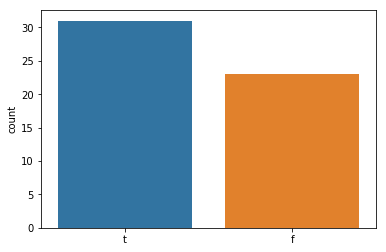

In [51]:
## class in train
sns.countplot(bool_train_target)

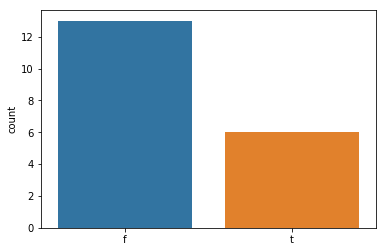

In [52]:
## class in eval
sns.countplot(bool_eval_target)

Train Benoulli model to predict authenticity of customer reviews using bool vectorizer

In [57]:
## Initialize the model
bool_BNB = BernoulliNB()

## fit the model
bool_BNB.fit(bool_train, bool_train_target)

## make prediction
bool_prediction = bool_BNB.predict(bool_eval)

## check the model performance
labels = ['t','f']
bool_cm = confusion_matrix(bool_prediction, bool_eval_target,labels)

print(bool_cm)

[[ 5 11]
 [ 1  2]]


Visualize confusion matrix using matplotlib

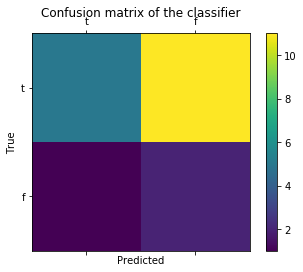

In [58]:
def plot_cm(cm):
    '''plot confusion matrix'''
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)

    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
plot_cm(bool_cm)

Create a pipeline and evaluate the whole of the training set using cross validation

In [59]:
## create a pipeline
def score_model_pipeline(model, vectorizer, X,y, cv=5):
  nbc = Pipeline([('vect', vectorizer), ('nb', model)])
  scores = cross_val_score(nbc, X,y,cv=cv)
  print('Avg Score: {}'.format(sum(scores)/len(scores)))
  
  
  
## Score the model using cross validation of 10. Using the whole training sets
score_model_pipeline(BernoulliNB(),unigram_bool_vectorizer,myList, lie_label, cv=10 )

Avg Score: 0.5190476190476191


**Using Count Vectorizer**

In [60]:
## split the train datasets into two, training and evaluation sets
count_train, count_eval, count_train_target, count_eval_target = train_test_split(count_df, lie_label, random_state=0)

## print the shape of the datasets
print("count_train: {}".format(count_train.shape))
print("count_train_target: {}".format(count_train_target.shape))
print("count_eval: {}".format(count_eval.shape))
print("count_eval_target: {}".format(count_eval_target.shape))

count_train: (54, 70)
count_train_target: (54,)
count_eval: (19, 70)
count_eval_target: (19,)


Check if class distribution in the train and evaluation sets

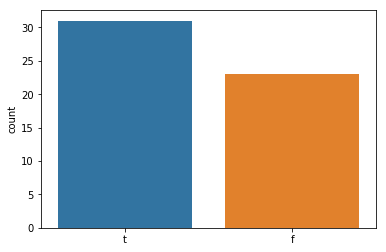

In [61]:
sns.countplot(count_train_target)

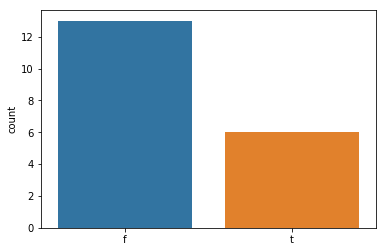

In [62]:
sns.countplot(count_eval_target)

Train and fit the model

In [63]:
## Initialize the model
count_BNB = BernoulliNB()

## fit the model
count_BNB.fit(count_train, count_train_target)

## make prediction
count_prediction = count_BNB.predict(count_eval)

## check the model performance
labels = ['t','f']
count_cm = confusion_matrix(count_prediction, count_eval_target,labels)

print(count_cm)

[[ 5 11]
 [ 1  2]]


plot confusion matrix

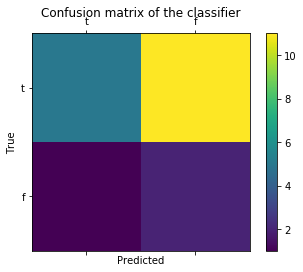

In [64]:
plot_cm(count_cm)

Cross validation score of the whole training set. using cv=10

In [65]:
## Score the model using cross validation of 10. Using the whole training sets
score_model_pipeline(BernoulliNB(),unigram_count_vectorizer,myList, lie_label, cv=10 )

Avg Score: 0.5190476190476191


**Using Ngrams Vectorizer**

In [66]:
## split the train datasets into two, training and evaluation sets
ngram_train, ngram_eval, ngram_train_target, ngram_eval_target = train_test_split(ngram_df, lie_label, random_state=0)

## print the shape of the datasets
print("ngram_train: {}".format(ngram_train.shape))
print("ngram_train_target: {}".format(ngram_train_target.shape))
print("ngram_eval: {}".format(ngram_eval.shape))
print("ngram_eval_target: {}".format(ngram_eval_target.shape))

ngram_train: (54, 70)
ngram_train_target: (54,)
ngram_eval: (19, 70)
ngram_eval_target: (19,)


Check the label class distribution

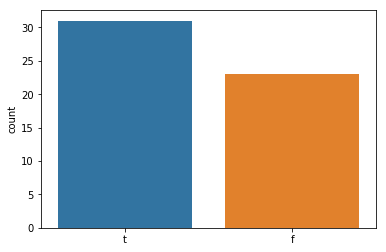

In [67]:
sns.countplot(ngram_train_target)

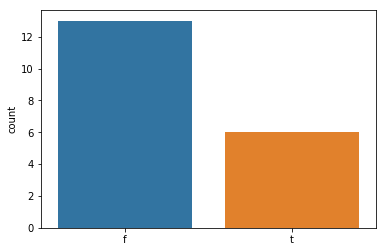

In [68]:
sns.countplot(ngram_eval_target)

Fit and Train the model

In [69]:
## Initialize the model
ngram_BNB = BernoulliNB()

## fit the model
ngram_BNB.fit(ngram_train, ngram_train_target)

## make prediction
ngram_prediction = ngram_BNB.predict(ngram_eval)

## check the model performance
labels = ['t','f']
ngram_cm = confusion_matrix(ngram_prediction, ngram_eval_target,labels)

print(ngram_cm)

[[ 5 11]
 [ 1  2]]


Visualized the confusion matrix

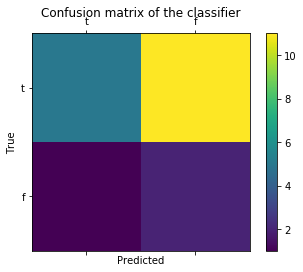

In [70]:
plot_cm(ngram_cm)

Cross Validation using 10 fold

In [71]:
## Score the model using cross validation of 10. Using the whole training sets
score_model_pipeline(BernoulliNB(),gram12_count_vectorizer,myList, lie_label, cv=10 )

Avg Score: 0.5190476190476191


**Using TF*IDF Vectorizer**

In [72]:
## split the train datasets into two, training and evaluation sets
tfidf_train, tfidf_eval, tfidf_train_target, tfidf_eval_target = train_test_split(tfidf_df, lie_label, random_state=0)

## print the shape of the datasets
print("tfidf_train: {}".format(tfidf_train.shape))
print("tfidf_train_target: {}".format(tfidf_train_target.shape))
print("tfidf_eval: {}".format(tfidf_eval.shape))
print("tfidf_eval_target: {}".format(tfidf_eval_target.shape))

tfidf_train: (54, 70)
tfidf_train_target: (54,)
tfidf_eval: (19, 70)
tfidf_eval_target: (19,)


Fit and Train the model

In [73]:
## Initialize the model
tfidf_BNB = BernoulliNB()

## fit the model
tfidf_BNB.fit(tfidf_train, tfidf_train_target)

## make prediction
tfidf_prediction = tfidf_BNB.predict(tfidf_eval)

## check the model performance
labels = ['t','f']
tfidf_cm = confusion_matrix(tfidf_prediction, tfidf_eval_target,labels)

print(tfidf_cm)

[[ 5 11]
 [ 1  2]]


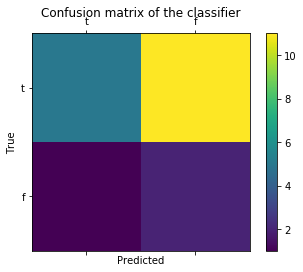

In [74]:
plot_cm(tfidf_cm)

In [75]:
## Score the model using cross validation of 10. Using the whole training sets
score_model_pipeline(BernoulliNB(),unigram_tfidf_vectorizer,myList, lie_label, cv=10 )

Avg Score: 0.5190476190476191


### Model: Multinomial Naive Bayes

**Bool Vectorizer**

In [76]:
score_model_pipeline(MultinomialNB(),unigram_bool_vectorizer,myList, lie_label, cv=10 )

Avg Score: 0.46547619047619043


**Count Vectorizer**

In [77]:
## Score the model using cross validation of 10. Using the whole training sets
score_model_pipeline(MultinomialNB(),unigram_count_vectorizer,myList, lie_label, cv=10 )

Avg Score: 0.4119047619047619


**Ngram Vectorizer**

In [78]:
## Score the model using cross validation of 10. Using the whole training sets
score_model_pipeline(MultinomialNB(),gram12_count_vectorizer,myList, lie_label, cv=10 )

Avg Score: 0.4119047619047619


**TF*IDF Vectorizer**

In [79]:
## Score the model using cross validation of 10. Using the whole training sets
score_model_pipeline(MultinomialNB(),unigram_tfidf_vectorizer,myList, lie_label, cv=10 )

Avg Score: 0.39464285714285713


## Sentiment Classification

### Model: Benoulli Naive Bayes

**Bool Vectorizer**

In [80]:
score_model_pipeline(BernoulliNB(),unigram_bool_vectorizer,myList, sentiment_label, cv=10 )

Avg Score: 0.7517857142857143


**Count Vectorizer**

In [81]:
score_model_pipeline(BernoulliNB(),unigram_count_vectorizer,myList, sentiment_label, cv=10 )

Avg Score: 0.7517857142857143


**ngrams Vectorizer**

In [82]:
score_model_pipeline(BernoulliNB(),gram12_count_vectorizer,myList, sentiment_label, cv=10 )

Avg Score: 0.7517857142857143


**TF*IDF Vectorizer**

In [83]:
score_model_pipeline(BernoulliNB(),unigram_tfidf_vectorizer,myList, sentiment_label, cv=10 )

Avg Score: 0.7517857142857143


### Model: Multinomial Naive Bayes

**Bool Vectorizer**

In [84]:
score_model_pipeline(MultinomialNB(),unigram_bool_vectorizer,myList, sentiment_label, cv=10 )

Avg Score: 0.7642857142857143


**Count Vectorizer**

In [85]:
score_model_pipeline(MultinomialNB(),unigram_count_vectorizer,myList, sentiment_label, cv=10 )

Avg Score: 0.8303571428571429


**ngram vectorizer**

In [86]:
score_model_pipeline(MultinomialNB(),gram12_count_vectorizer,myList, sentiment_label, cv=10 )

Avg Score: 0.8303571428571429


**TF*IDF Vectorizer**

In [87]:
score_model_pipeline(MultinomialNB(),unigram_tfidf_vectorizer,myList, sentiment_label, cv=10 )

Avg Score: 0.7988095238095237


## Cross validation score of the entire datasets

**Lie Classification**

In [92]:
## create a model container
model = {}

## add benoulli and multinomial naives to the model cointainer
model['BNB'] = BernoulliNB()
model['MNB'] = MultinomialNB()

## create a vectorization container
vec = {}

## add vectorizer to the container
vec['bool'] = CountVectorizer(input="content",encoding='latin-1', binary=True, min_df=5, stop_words='english')
vec['count'] =  CountVectorizer(input="content",encoding='latin-1', binary=False, min_df=5, stop_words='english')
vec['ngram'] = CountVectorizer(input="content",encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')
vec['tfidf'] = TfidfVectorizer(input="content",encoding='latin-1', use_idf=True, min_df=5, stop_words='english')

## 10 fold cross validation function
## create a pipeline
def score_model_pipeline(model, vectorizer, X,y, cv=10):
  '''10 fold cross validation pipeline and return the average scores'''
  nbc = Pipeline([('vect', vectorizer), ('nb', model)])
  scores = cross_val_score(nbc, X,y,cv=cv)
  print('Avg Score: {}'.format(sum(scores)/len(scores)))
  return sum(scores)/len(scores)


## get features and label from dataframe
def get_X_y_from_df(df, X='text', y='label'):
  '''get the text,features and the label, the target. return features and target'''
  X = list(df[X].values)
  y = df[y].values
  return X,y

## create an emty list to store score
score = []
vec_use = []
model_use= []

## get X and y
X,y = get_X_y_from_df(deception, X='cleanreview', y='lie')

## run the cross validation using the pipeline
for mod in model:
  # loop through the model in the model container
  for v in vec:
    # loop through the vectorizer in the vectorizer container
    cv = score_model_pipeline(model[mod], vec[v], X,y)
    score.append(cv)  # append the score
    vec_use.append(v)  # append the vectorization used
    model_use.append(mod) # append the model used
    
    
  
## create a date frame of cross validation score of the classifier
result = {'Model': model_use, 'Vectorization': vec_use, '10 fold Avg Score': score}
lie_df = pd.DataFrame(result)
lie_df

Avg Score: 0.57
Avg Score: 0.57
Avg Score: 0.5599999999999999
Avg Score: 0.57
Avg Score: 0.53
Avg Score: 0.5599999999999999
Avg Score: 0.5599999999999999
Avg Score: 0.5375


,Model,Vectorization,10 fold Avg Score
0,BNB,bool,0.5700
1,BNB,count,0.5700
2,BNB,ngram,0.5600
3,BNB,tfidf,0.5700
4,MNB,bool,0.5300
5,MNB,count,0.5600
6,MNB,ngram,0.5600
7,MNB,tfidf,0.5375


**Sentiment**

In [93]:
## create a model container
model = {}

## add benoulli and multinomial naives to the model cointainer
model['BNB'] = BernoulliNB()
model['MNB'] = MultinomialNB()

## create a vectorization container
vec = {}

## add vectorizer to the container
vec['bool'] = CountVectorizer(input="content",encoding='latin-1', binary=True, min_df=5, stop_words='english')
vec['count'] =  CountVectorizer(input="content",encoding='latin-1', binary=False, min_df=5, stop_words='english')
vec['ngram'] = CountVectorizer(input="content",encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')
vec['tfidf'] = TfidfVectorizer(input="content",encoding='latin-1', use_idf=True, min_df=5, stop_words='english')

## 10 fold cross validation function
## create a pipeline
def score_model_pipeline(model, vectorizer, X,y, cv=10):
  '''10 fold cross validation pipeline and return the average scores'''
  nbc = Pipeline([('vect', vectorizer), ('nb', model)])
  scores = cross_val_score(nbc, X,y,cv=cv)
  print('Avg Score: {}'.format(sum(scores)/len(scores)))
  return sum(scores)/len(scores)


## get features and label from dataframe
def get_X_y_from_df(df, X='text', y='label'):
  '''get the text,features and the label, the target. return features and target'''
  X = list(df[X].values)
  y = df[y].values
  return X,y

## create an emty list to store score
score = []
vec_use = []
model_use= []

## get X and y
X,y = get_X_y_from_df(deception, X='cleanreview', y='sentiment')

## run the cross validation using the pipeline
for mod in model:
  # loop through the model in the model container
  for v in vec:
    # loop through the vectorizer in the vectorizer container
    cv = score_model_pipeline(model[mod], vec[v], X,y)
    score.append(cv)  # append the score
    vec_use.append(v)  # append the vectorization used
    model_use.append(mod) # append the model used
    
    
  
## create a date frame of cross validation score of the classifier
result = {'Model': model_use, 'Vectorization': vec_use, '10 fold Avg Score': score}
sentiment_df = pd.DataFrame(result)
sentiment_df

Avg Score: 0.7825
Avg Score: 0.7825
Avg Score: 0.7825
Avg Score: 0.7825
Avg Score: 0.7675
Avg Score: 0.8100000000000002
Avg Score: 0.8100000000000002
Avg Score: 0.8


,Model,Vectorization,10 fold Avg Score
0,BNB,bool,0.7825
1,BNB,count,0.7825
2,BNB,ngram,0.7825
3,BNB,tfidf,0.7825
4,MNB,bool,0.7675
5,MNB,count,0.8100
6,MNB,ngram,0.8100
7,MNB,tfidf,0.8000


## Selected Vectorizer and model for each class

**Lie**
* Bool Vectorizer
* Benoulli Naive Bayes

**Sentiment**
* Ngram count Vectorizer
* Multinomial Naive Bayes

## Final Model and Optimization for Possible Increase in Accuracy

**Lie**

**Model**

[[5 4]
 [4 6]]


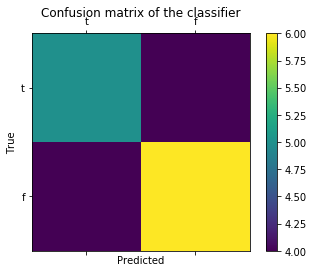

In [95]:
## vectorizer
unigram_bool_vectorizer = CountVectorizer(input="content",encoding='latin-1', binary=True, min_df=5, stop_words='english')

## lie detection in customer review using Benoulli Naive Bayes
lie_model = BernoulliNB()

## vectorized the train set
train_vec = unigram_bool_vectorizer.fit_transform(myList)
train_features = unigram_bool_vectorizer.get_feature_names()

## dataframe
train_bool_df = pd.DataFrame(train_vec.toarray(), columns=train_features)


## fit the model using bool vectors
lie_model.fit(train_bool_df, lie_label)

## vectorized the test data using bool vectorizer
testList = list(test.cleanreview.values)

test_vec = unigram_bool_vectorizer.transform(testList)
test_features = unigram_bool_vectorizer.get_feature_names()
test_bool_df = pd.DataFrame(test_vec.toarray(), columns=test_features)

test_lie_label = test.lie.values  # get the test label


## make prediction on a new datasets
bool_test_prediction = lie_model.predict(test_bool_df)

## check the model performance
label = ['t', 'f']
test_cm = confusion_matrix(bool_test_prediction, test_lie_label, label)

print(test_cm)


## visualize the confusion matrix
plot_cm(test_cm)

**Feature Importance**

In [96]:
# feature importance
featLogProb = []
ind = 0
for feats in train_bool_df.columns:
    ## the following line takes the difference of the log prob of feature given model
    ## thus it measure the importance of the feature for classification.
    featLogProb.append(abs(lie_model.feature_log_prob_[1,ind] - lie_model.feature_log_prob_[0,ind]))
    s = ""
    s += (feats)
    s +="  " 
    s += str(featLogProb[ind])
    s += "\n" 
    print(s)
    ind = ind + 1

amazing  0.2082970431972151

ask  0.26170658604852015

asked  0.4314405945114248

bad  0.3794896217049035

bar  0.8903152454708945

best  0.5368011101692511

called  0.31365755885504143

came  0.02597548640326064

chicken  0.19716806491094907

chinese  0.26170658604852015

cold  1.8177349556313156

definitely  0.8732733467904639

delicious  1.1245877750713702

didnt  0.5368011101692511

dine  0.9422662182774157

dining  0.5855912743386831

dinner  0.2082970431972151

dish  0.26170658604852015

dishes  0.36244772302447337

dont  0.7191226669632056

environment  0.8903152454708945

experience  0.22664618186541174

favorite  0.19716806491094907

food  0.02597548640326064

fresh  0.2082970431972151

friendly  0.02597548640326064

friends  0.26170658604852015

going  0.24911903771747035

good  0.48485013736272986

great  0.6137621513053797

high  0.9422662182774157

just  0.02597548640326064

later  0.31365755885504143

life  0.48485013736272986

like  0.34442921752179556

long  0.313657558

**Sort the feature importance and get the top 20 predictor**

In [97]:
#feats_sorted = sorted(featLogProb , reverse = True)
## Sort features based on importance!
sort_inds = sorted(range(len(featLogProb)), key=featLogProb.__getitem__, reverse = True)
for i in range(20):
    s = ""
    s += train_bool_df.columns[sort_inds[i]]
    s += ":  "
    s += str(featLogProb[sort_inds[i]])
    s += "\n"
    print(s)

cold:  1.8177349556313156

want:  1.8177349556313156

said:  1.2787384548986285

delicious:  1.1245877750713702

staff:  1.1245877750713702

dine:  0.9422662182774157

high:  0.9422662182774157

meal:  0.9422662182774157

sauce:  0.9422662182774157

waiters:  0.9422662182774157

worth:  0.9422662182774157

bar:  0.8903152454708945

environment:  0.8903152454708945

definitely:  0.8732733467904639

people:  0.8213223739839426

dont:  0.7191226669632056

order:  0.7191226669632056

prices:  0.7191226669632056

table:  0.7191226669632056

great:  0.6137621513053797



**Using nltk stemmer to see if it will improve the performance of the model**

[[6 5]
 [3 5]]


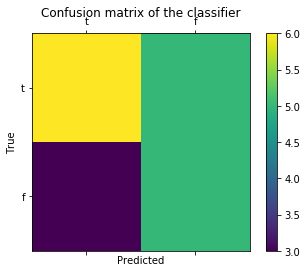

In [99]:
## eglish stemmer
english_stemmer = nltk.stem.SnowballStemmer('english')

## class to tem and vectorized doc
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])
      
      
      
##  stem vectorizer
stem_bool_vectorizer = StemmedCountVectorizer(input="content",encoding='latin-1', binary=True, min_df=5, stop_words='english', analyzer="word")

## lie detection in customer review using Benoulli Naive Bayes
lie_model2 = BernoulliNB()



## vectorized the train set
train_vec2 = stem_bool_vectorizer.fit_transform(myList)
train_features2 = stem_bool_vectorizer.get_feature_names()

## dataframe
train_bool_df2 = pd.DataFrame(train_vec2.toarray(), columns=train_features2)


## fit the model using bool vectors
lie_model2.fit(train_bool_df2, lie_label)

## vectorized the test data using bool vectorizer
testList = list(test.cleanreview.values)

test_vec2 = stem_bool_vectorizer.transform(testList)
test_features2 = stem_bool_vectorizer.get_feature_names()
test_bool_df2 = pd.DataFrame(test_vec2.toarray(), columns=test_features2)

test_lie_label2 = test.lie.values  # get the test label


## make prediction on a new datasets
bool_test_prediction2 = lie_model2.predict(test_bool_df2)

## check the model performance
label = ['t', 'f']
test_cm2 = confusion_matrix(bool_test_prediction2, test_lie_label2, label)

print(test_cm2)


## visualize the confusion matrix
plot_cm(test_cm2)


Without stemmer

In [100]:
print(lie_model.score(test_bool_df, test_lie_label))

0.5789473684210527


Using Stemmer

In [101]:
print(lie_model2.score(test_bool_df2, test_lie_label2))

0.5789473684210527


**Sentiment**

**Model**

[[9 0]
 [2 8]]


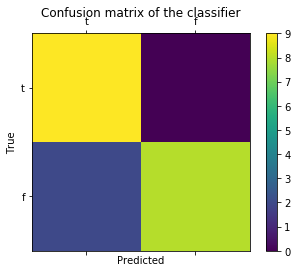

In [105]:
##  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(input="content",encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')


## Model
sentiment_model = MultinomialNB()


## vectorized the train set
train_vec =gram12_count_vectorizer.fit_transform(myList)
train_features = gram12_count_vectorizer.get_feature_names()

## dataframe
train_ngram_df = pd.DataFrame(train_vec.toarray(), columns=train_features)


## fit the model using bool vectors
sentiment_model.fit(train_ngram_df, sentiment_label)

## vectorized the test data using bool vectorizer
testList = list(test.cleanreview.values)

test_vec = gram12_count_vectorizer.transform(testList)
test_features = gram12_count_vectorizer.get_feature_names()
test_ngram_df = pd.DataFrame(test_vec.toarray(), columns=test_features)

test_sentiment_label = test.sentiment.values  # get the test label


## make prediction on a new datasets
ngram_test_prediction = sentiment_model.predict(test_ngram_df)

## check the model performance
label = ['t', 'f']
test_cm_sentiment = confusion_matrix(ngram_test_prediction, test_sentiment_label)

print(test_cm_sentiment)


## visualize the confusion matrix
plot_cm(test_cm_sentiment)


Feature Importance

In [106]:
# feature importance
featLogProb = []
ind = 0
for feats in train_ngram_df.columns:
    ## the following line takes the difference of the log prob of feature given model
    ## thus it measure the importance of the feature for classification.
    featLogProb.append(abs(sentiment_model.feature_log_prob_[1,ind] - sentiment_model.feature_log_prob_[0,ind]))
    s = ""
    s += (feats)
    s +="  " 
    s += str(featLogProb[ind])
    s += "\n" 
    print(s)
    ind = ind + 1

amazing  2.705095989204778

ask  1.0564373636173965

asked  2.1624384612508045

bad  1.3639307650330323

bar  0.14014663174324138

best  1.9727280954915511

called  0.7761441001309137

came  1.939294909936594

chicken  0.3298569975024934

chinese  0.699762419678664

cold  0.9584656569248686

definitely  0.3224681885371954

delicious  1.3929096002386094

didnt  0.14014663174324138

dine  0.9584656569248686

dining  0.699762419678664

dinner  0.014004048084017562

dish  0.9584656569248686

dishes  0.1475354407085394

dont  0.08299691957096833

environment  1.0564373636173965

experience  0.053135254753611694

favorite  0.5456117398514051

food  0.053135254753611694

fresh  1.8448947239816667

friendly  1.5264409928631322

friends  0.5456117398514055

going  0.4194691561921813

good  0.42782870419502217

great  1.5870656146795667

high  0.42782870419502217

just  0.8714542799352385

later  0.7761441001309137

life  0.14014663174324138

like  0.14014663174324138

long  0.7761441001309137



**Sort and print the top 20 predictor**

In [107]:

## Sort features based on importance!
sort_inds = sorted(range(len(featLogProb)), key=featLogProb.__getitem__, reverse = True)
for i in range(20):
    s = ""
    s += train_ngram_df.columns[sort_inds[i]]
    s += ":  "
    s += str(featLogProb[sort_inds[i]])
    s += "\n"
    print(s)

amazing:  2.705095989204778

terrible:  2.2577486410551293

asked:  2.1624384612508045

took:  2.0570779455929777

best:  1.9727280954915511

came:  1.939294909936594

said:  1.939294909936594

fresh:  1.8448947239816667

great:  1.5870656146795667

friendly:  1.5264409928631322

nice:  1.5264409928631322

prices:  1.5264409928631322

minutes:  1.400298409203907

delicious:  1.3929096002386094

need:  1.3929096002386094

bad:  1.3639307650330323

wasnt:  1.3639307650330323

sauce:  1.1209758847549676

ask:  1.0564373636173965

environment:  1.0564373636173965



Use stemmer to see if model will perform better

[[9 0]
 [2 8]]


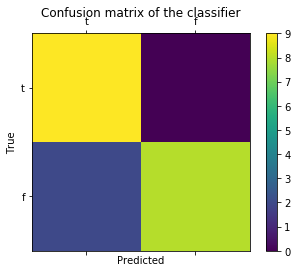

In [108]:
##  stem vectorizer
stem_ngram_vectorizer = StemmedCountVectorizer(input="content",encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english', analyzer="word")

## Model
sentiment_model2 = MultinomialNB()


## vectorized the train set
train_vec2 =stem_ngram_vectorizer.fit_transform(myList)
train_features2 = stem_ngram_vectorizer.get_feature_names()

## dataframe
train_ngram_df2 = pd.DataFrame(train_vec2.toarray(), columns=train_features2)


## fit the model using bool vectors
sentiment_model2.fit(train_ngram_df2, sentiment_label)

## vectorized the test data using bool vectorizer
testList = list(test.cleanreview.values)

test_vec2 = stem_ngram_vectorizer.transform(testList)
test_features2 = stem_ngram_vectorizer.get_feature_names()
test_ngram_df2 = pd.DataFrame(test_vec2.toarray(), columns=test_features2)

test_sentiment_label2 = test.sentiment.values  # get the test label


## make prediction on a new datasets
ngram_test_prediction2 = sentiment_model2.predict(test_ngram_df2)

## check the model performance
label = ['t', 'f']
test_cm_sentiment2 = confusion_matrix(ngram_test_prediction2, test_sentiment_label2)

print(test_cm_sentiment2)


## visualize the confusion matrix
plot_cm(test_cm_sentiment2)
